# Домашняя работа №1

### Часть первая, с блекджеком и стратегиями

1.	Рассмотрим очень простую стратегию: говорить stand, если у нас на руках комбинация в 19, 20 или 21 очко, во всех остальных случаях говорить hit. Используйте методы Монте-Карло, чтобы оценить выигрыш от этой стратегии.

In [1]:
import gym
import gym.envs.toy_text.blackjack as blackjack
from gym import spaces
from gym.utils import seeding

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\zelen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zelen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zelen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\zelen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zelen\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
def cmp(a, b):
    return float(a > b) - float(a < b)

In [3]:
deck = 4 * [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

In [4]:
def give_card(koloda):
    return koloda[0], koloda[1:]

In [5]:
card = [1,2,5,2,1]

In [6]:
card.sort()
card

[1, 1, 2, 2, 5]

In [7]:
def usable_ace(card):  # Does this hand have a usable ace?
    suma = 0
    for i in range(len(card)):
        if card[i] != 1:
            suma += card[i]
        else:
            suma +=11
    
    for i in range(len(card)):
        if suma > 21 and card[i] == 1:
            suma -= 10
    return suma

In [17]:
sum_player = 0
sum_agent = 0
random.shuffle(deck)
koloda = deck.copy()
i = 0
pl_card = []
ag_card = []
while sum_player < 19:
    (take_card, koloda) = give_card(koloda)
    pl_card.append(take_card)
    sum_player = usable_ace(pl_card)
    i += 1
    
if i == 2 and sum_player == 21:
    win_pl = 1.5
elif sum_player > 21:
    win_pl = -1
else:
    sum_agent = 0
    while sum_agent < 17:
        (take_card, koloda) = give_card(koloda)
        ag_card.append(take_card)
        sum_agent = usable_ace(ag_card)
    if sum_agent > 21:
        win_pl = 1
    else:
        win_pl = cmp(sum_player, sum_agent)

print(win_pl)
print(sum_player)
print(sum_agent)

1.0
20
19


In [23]:
sum_itog = 0
epoch = 1000000
for i in range(epoch):
    sum_player = 0
    sum_agent = 0
    random.shuffle(deck)
    koloda = deck.copy()
    i = 0
    pl_card = []
    ag_card = []
    while sum_player < 19:
        (take_card, koloda) = give_card(koloda)
        pl_card.append(take_card)
        sum_player = usable_ace(pl_card)
        i += 1
    
    if i == 2 and sum_player == 21:
        win_pl = 1.5
    elif sum_player > 21:
        win_pl = -1
    else:
        sum_agent = 0
        while sum_agent < 17:
            (take_card, koloda) = give_card(koloda)
            ag_card.append(take_card)
            sum_agent = usable_ace(ag_card)
        if sum_agent > 21:
            win_pl = 1
        else:
            win_pl = cmp(sum_player, sum_agent)
    sum_itog += win_pl

print(sum_itog/epoch)

-0.174457


2.	Реализуйте метод обучения с подкреплением без модели (можно Q-обучение, но рекомендую попробовать и другие, например Monte Carlo control) для обучения стратегии в блекджеке, используя окружение Blackjack-v0 из OpenAI Gym.

In [24]:
#player
dict_rez = {}
eps = 0.1
discont = 0.5
epoch = 100000
sum_itog = 0
for i in range(epoch):
#словарь в который будем записывать ключи заполняемые 5 
    new_dict = {}
    sum_player = 0
    sum_agent = 0
    random.shuffle(deck)
    koloda = deck.copy()
    pl_card = []
    ag_card = []
    
    (take_card, koloda) = give_card(koloda)
    pl_card.append(take_card)
    sum_player = usable_ace(pl_card)
    
    (take_card, koloda) = give_card(koloda)
    pl_card.append(take_card)
    sum_player = usable_ace(pl_card)
    
    (take_card, koloda) = give_card(koloda)
    ag_card.append(take_card)
    sum_agent = usable_ace(ag_card)

    if sum_player == 21:
        win_pl = 1.5
        a = (sum_player, sum_agent, 0)
        if a in dict_rez.keys():
            b = dict_rez[a]
            b.append(1.5)
            dict_rez[a] = b
        else:
            b = [1.5]
            dict_rez[a] = b
    elif sum_player < 12:
        while(sum_player < 12):
            (take_card, koloda) = give_card(koloda)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
    else:
        rand = random.uniform(-1*eps, eps)
    #Проверяем, были ли раньше данные исходы и на основе их принимаем решение
        a = (sum_player, sum_agent, 1)
        b = (sum_player, sum_agent, 0)
        if a in dict_rez.keys():
            G_1 = 0
            for i in range(len(dict_rez[a])):
                G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
        else:
            G_1 = 0
        if b in dict_rez.keys():
            G_2 = 0
            for i in range(len(dict_rez[b])):
                G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
        else:
            G_2 = 0
        if (G_1 - G_2 + random.uniform(-1*eps, eps)) > 0:
            G = 1
        else:
            G = 0
    #Добавляем элемент в словарь
        player_key = (sum_player, sum_agent, G)
        if player_key in dict_rez.keys():
            element = dict_rez[player_key]
            element.append(5)
            dict_rez[player_key] = element
            new_dict[player_key] = 1
        else:
            element = [5]
            dict_rez[player_key] = element
            new_dict[player_key] = 1
        while(G != 0 and sum_player < 21):
            rand = random.uniform(-1*eps, eps)
            (take_card, koloda) = give_card(koloda)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
            a = (sum_player, sum_agent, 1)
            b = (sum_player, sum_agent, 0)
            if a in dict_rez.keys():
                G_1 = 0
                for i in range(len(dict_rez[a])):
                    G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
            else:
                G_1 = 0
            if b in dict_rez.keys():
                G_2 = 0
                for i in range(len(dict_rez[b])):
                    G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
            else:
                G_2 = 0
            if (G_1 - G_2 + random.uniform(-1*eps, eps)) > 0:
                G = 1
            else:
                G = 0
            player_key = (sum_player, sum_agent, G)
            if player_key in dict_rez.keys():
                element = dict_rez[player_key]
                element.append(5)
                dict_rez[player_key] = element
                new_dict[player_key] = 1
            else:
                element = [5]
                dict_rez[player_key] = element
                new_dict[player_key] = 1
        
        
        if sum_player > 21:
            win_pl = -1
            for i in new_dict.keys():
                dict_rez[i][-1] = win_pl
        else:
            while sum_agent < 17:
                (take_card, koloda) = give_card(koloda)
                ag_card.append(take_card)
                sum_agent = usable_ace(ag_card)
            if sum_agent > 21:
                win_pl = 1
                for i in new_dict.keys():
                    dict_rez[i][-1] = win_pl
            else:
                win_pl = cmp(sum_player, sum_agent)
                for i in new_dict.keys():
                    dict_rez[i][-1] = win_pl
    sum_itog += win_pl
    
print(sum_itog/epoch)
        #обратным проходом добавить в значение -1 
#agent


-0.063615


3.	Сколько выигрывает казино у вашей стратегии? Нарисуйте графики среднего дохода вашего метода (усреднённого по крайней мере по 100000 раздач, а лучше больше) по ходу обучения. Попробуйте подобрать оптимальные гиперпараметры

In [25]:
best_eps = np.arange(0, 1, 0.1)
best_discont = np.arange(0, 1, 0.1)
rez_graph = []
rez_eps = []
rez_discont = []
rez_ishod = []
for eps_i in best_eps:
    for discont_i in best_discont:
        dict_rez = {}
        eps = eps_i
        discont = discont_i
        epoch = 100000
        sum_itog = 0
        for i in range(epoch):
#словарь в который будем записывать ключи заполняемые 5 
            new_dict = {}
            sum_player = 0
            sum_agent = 0
            random.shuffle(deck)
            koloda = deck.copy()
            pl_card = []
            ag_card = []
            
            (take_card, koloda) = give_card(koloda)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
    
            (take_card, koloda) = give_card(koloda)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
    
            (take_card, koloda) = give_card(koloda)
            ag_card.append(take_card)
            sum_agent = usable_ace(ag_card)

            if sum_player == 21:
                win_pl = 1.5
                a = (sum_player, sum_agent, 0)
                if a in dict_rez.keys():
                    b = dict_rez[a]
                    b.append(1.5)
                    dict_rez[a] = b
                else:
                    b = [1.5]
                    dict_rez[a] = b
            elif sum_player < 12:
                while(sum_player < 12):
                    (take_card, koloda) = give_card(koloda)
                    pl_card.append(take_card)
                    sum_player = usable_ace(pl_card)
            else:
                rand = random.uniform(-1*eps, eps)
    #Проверяем, были ли раньше данные исходы и на основе их принимаем решение
                a = (sum_player, sum_agent, 1)
                b = (sum_player, sum_agent, 0)
                if a in dict_rez.keys():
                    G_1 = 0
                    for i in range(len(dict_rez[a])):
                        G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
                else:
                    G_1 = 0
                if b in dict_rez.keys():
                    G_2 = 0
                    for i in range(len(dict_rez[b])):
                        G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
                else:
                    G_2 = 0
                if (G_1 - G_2 + random.uniform(-1*eps, eps)) > 0:
                    G = 1
                else:
                    G = 0
    #Добавляем элемент в словарь
                player_key = (sum_player, sum_agent, G)
                if player_key in dict_rez.keys():
                    element = dict_rez[player_key]
                    element.append(5)
                    dict_rez[player_key] = element
                    new_dict[player_key] = 1
                else:
                    element = [5]
                    dict_rez[player_key] = element
                    new_dict[player_key] = 1
                while(G != 0 and sum_player < 21):
                    rand = random.uniform(-1*eps, eps)
                    (take_card, koloda) = give_card(koloda)
                    pl_card.append(take_card)
                    sum_player = usable_ace(pl_card)
                    a = (sum_player, sum_agent, 1)
                    b = (sum_player, sum_agent, 0)
                    if a in dict_rez.keys():
                        G_1 = 0
                        for i in range(len(dict_rez[a])):
                            G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
                    else:
                        G_1 = 0
                    if b in dict_rez.keys():
                        G_2 = 0
                        for i in range(len(dict_rez[b])):
                            G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
                    else:
                        G_2 = 0
                    if (G_1 - G_2 + random.uniform(-1*eps, eps)) > 0:
                        G = 1
                    else:
                        G = 0
                    player_key = (sum_player, sum_agent, G)
                    if player_key in dict_rez.keys():
                        element = dict_rez[player_key]
                        element.append(5)
                        dict_rez[player_key] = element
                        new_dict[player_key] = 1
                    else:
                        element = [5]
                        dict_rez[player_key] = element
                        new_dict[player_key] = 1
        
        
                if sum_player > 21:
                    win_pl = -1
                    for i in new_dict.keys():
                        dict_rez[i][-1] = win_pl
                else:
                    while sum_agent < 17:
                        (take_card, koloda) = give_card(koloda)
                        ag_card.append(take_card)
                        sum_agent = usable_ace(ag_card)
                    if sum_agent > 21:
                        win_pl = 1
                        for i in new_dict.keys():
                            dict_rez[i][-1] = win_pl
                    else:
                        win_pl = cmp(sum_player, sum_agent)
                        for i in new_dict.keys():
                            dict_rez[i][-1] = win_pl
            sum_itog += win_pl
    
        rez_graph.append((eps_i,discont_i,sum_itog/epoch))
        rez_eps.append(eps_i)
        rez_discont.append(discont_i)
        rez_ishod.append(sum_itog/epoch)

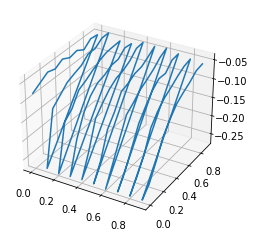

In [26]:
z = rez_ishod
x = rez_eps
y = rez_discont
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

In [31]:
max_rez = max(rez_ishod)
max_rez

-0.038915

уже лучше, но казино еще нас обыгрывает

## Часть вторая, удвоенная

In [86]:
#player
dict_rez = {}
dict_rez_seclast = {}
eps = 0.1
discont = 0.5
epoch = 100000
sum_itog = 0
for i in range(epoch):
#словарь в который будем записывать ключи заполняемые 5 
    new_dict = {}
    win_0 = 1
    sum_player = 0
    sum_agent = 0
    random.shuffle(deck)
    koloda = deck.copy()
    pl_card = []
    ag_card = []
    
    (take_card, koloda) = give_card(koloda)
    pl_card.append(take_card)
    sum_player = usable_ace(pl_card)
    
    (take_card, koloda) = give_card(koloda)
    pl_card.append(take_card)
    sum_player = usable_ace(pl_card)
    
    (take_card, koloda) = give_card(koloda)
    ag_card.append(take_card)
    sum_agent = usable_ace(ag_card)

    if sum_player == 21:
        win_pl = 1.5
        G = 0
        a = (sum_player, sum_agent, 0)
        if a in dict_rez.keys():
            b = dict_rez[a]
            b.append(1.5)
            dict_rez[a] = b
        else:
            b = [1.5]
            dict_rez[a] = b
    elif sum_player < 12:
        while(sum_player < 12):
            a = (sum_player, sum_agent, 1)
             # удвоение ставки
            if a in dict_rez_seclast.keys():
                sum_2_x = 0
                for i in range(len(dict_rez_seclast[a])):
                    sum_2_x += dict_rez_seclast[a][i]
                if len(dict_rez_seclast[a]) > 10 and sum_2_x/len(dict_rez_seclast[a]) > 0.6:
                    G = 0
                    win_0 = 2
                    (take_card, koloda) = give_card(koloda)
                    pl_card.append(take_card)
                    sum_player = usable_ace(pl_card)
                    break
            (take_card, koloda) = give_card(koloda)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)

    else:
        rand = random.uniform(-1*eps, eps)
    #Проверяем, были ли раньше данные исходы и на основе их принимаем решение
        a = (sum_player, sum_agent, 1)
        b = (sum_player, sum_agent, 0)
        if a in dict_rez.keys():
            G_1 = 0
            for i in range(len(dict_rez[a])):
                G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
        else:
            G_1 = 0
        if b in dict_rez.keys():
            G_2 = 0
            for i in range(len(dict_rez[b])):
                G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
        else:
            G_2 = 0
        if (G_1 - G_2 + random.uniform(-1*eps, eps)) > 0:
            G = 1
        else:
            G = 0
        
        
      
        player_key = (sum_player, sum_agent, G)
        if player_key in dict_rez.keys():
            element = dict_rez[player_key]
            element.append(5)
            dict_rez[player_key] = element
            new_dict[player_key] = 1
        else:
            element = [5]
            dict_rez[player_key] = element
            new_dict[player_key] = 1
            

                   
        while(G != 0 and sum_player < 21):
            rand = random.uniform(-1*eps, eps)
            (take_card, koloda) = give_card(koloda)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
            a = (sum_player, sum_agent, 1)
            b = (sum_player, sum_agent, 0)
            
            # удвоение ставки
            if a in dict_rez_seclast.keys():
                sum_2_x = 0
                for i in range(len(dict_rez_seclast[a])):
                    sum_2_x += dict_rez_seclast[a][i] * discont**(len(dict_rez_seclast[a]) - i)
                if len(dict_rez_seclast[a]) > 10 and (sum_2_x/len(dict_rez_seclast[a])) > 0.6:
                    G = 0
                    win_0 = 2
                    (take_card, koloda) = give_card(koloda)
                    pl_card.append(take_card)
                    sum_player = usable_ace(pl_card)
                    break
            
            
            if a in dict_rez.keys():
                G_1 = 0
                for i in range(len(dict_rez[a])):
                    G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
            else:
                G_1 = 0
            if b in dict_rez.keys():
                G_2 = 0
                for i in range(len(dict_rez[b])):
                    G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
            elif b in dict_rez.keys():
                G_2 = 0
            if (G_1 - G_2 + random.uniform(-1*eps, eps)) > 0:
                G = 1
            else:
                G = 0
            player_key = (sum_player, sum_agent, G)
            if player_key in dict_rez.keys():
                element = dict_rez[player_key]
                element.append(5)
                dict_rez[player_key] = element
                new_dict[player_key] = 1
            else:
                element = [5]
                dict_rez[player_key] = element
                new_dict[player_key] = 1
        
        
        if sum_player > 21:
            win_pl = -1 * win_0
            for i in new_dict.keys():
                dict_rez[i][-1] = win_pl
        else:
            while sum_agent < 17:
                (take_card, koloda) = give_card(koloda)
                ag_card.append(take_card)
                sum_agent = usable_ace(ag_card)
            if sum_agent > 21:
                win_pl = win_0
                for i in new_dict.keys():
                    dict_rez[i][-1] = win_pl
            else:
                win_pl = win_0 * cmp(sum_player, sum_agent)
                for i in new_dict.keys():
                    dict_rez[i][-1] = win_pl
        #пополняем статистику предпоследних ходов
        a = []
        for i in new_dict.keys():
            a.append(i)
        if len(a)>2:   
            seclast_key = (a[-2][0], a[-2][1], 1)
            if seclast_key in dict_rez_seclast.keys():
                element = dict_rez_seclast[seclast_key]
                element.append(win_pl)
                dict_rez_seclast[seclast_key] = element

            else:
                element = [win_pl]
                dict_rez_seclast[seclast_key] = element
    sum_itog += win_pl
    
print(sum_itog/epoch)
        #обратным проходом добавить в значение -1 
#agent


-0.06099


Результат немного улучшился

In [8]:
best_eps = np.arange(0, 1, 0.1)
best_discont = np.arange(0, 1, 0.1)
rez_graph_2 = []
rez_eps_2 = []
rez_discont_2 = []
rez_ishod_2 = []
for eps_i in best_eps:
    for discont_i in best_discont:
        dict_rez = {}
        dict_rez_seclast = {}
        eps = eps_i
        discont = discont_i
        epoch = 100000
        sum_itog = 0
        for i in range(epoch):
#словарь в который будем записывать ключи заполняемые 5 
            new_dict = {}
            win_0 = 1
            sum_player = 0
            sum_agent = 0
            random.shuffle(deck)
            koloda = deck.copy()
            pl_card = []
            ag_card = []
    
            (take_card, koloda) = give_card(koloda)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
    
            (take_card, koloda) = give_card(koloda)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
    
            (take_card, koloda) = give_card(koloda)
            ag_card.append(take_card)
            sum_agent = usable_ace(ag_card)

            if sum_player == 21:
                win_pl = 1.5
                a = (sum_player, sum_agent, 0)
                if a in dict_rez.keys():
                    b = dict_rez[a]
                    b.append(1.5)
                    dict_rez[a] = b
                else:
                    b = [1.5]
                    dict_rez[a] = b
            elif sum_player < 12:
                while(sum_player < 12):
                    a = (sum_player, sum_agent, 1)
                    if a in dict_rez_seclast.keys():
                        sum_2_x = 0
                        for i in range(len(dict_rez_seclast[a])):
                            sum_2_x += dict_rez_seclast[a][i] * discont**(len(dict_rez_seclast[a]) - i)
                        if len(dict_rez_seclast[a]) > 10 and sum_2_x/len(dict_rez_seclast[a]) > 0.6:
                            G = 0
                            win_0 = 2
                            (take_card, koloda) = give_card(koloda)
                            pl_card.append(take_card)
                            sum_player = usable_ace(pl_card)
                            break
                    
                    
                    (take_card, koloda) = give_card(koloda)
                    pl_card.append(take_card)
                    sum_player = usable_ace(pl_card)
            else:
                rand = random.uniform(-1*eps, eps)
    #Проверяем, были ли раньше данные исходы и на основе их принимаем решение
                a = (sum_player, sum_agent, 1)
                b = (sum_player, sum_agent, 0)
                if a in dict_rez.keys():
                    G_1 = 0
                    for i in range(len(dict_rez[a])):
                        G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
                else:
                    G_1 = 0
                if b in dict_rez.keys():
                    G_2 = 0
                    for i in range(len(dict_rez[b])):
                        G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
                else:
                    G_2 = 0
                if (G_1 - G_2 + random.uniform(-1*eps, eps)) > 0:
                    G = 1
                else:
                    G = 0
        
        
                player_key = (sum_player, sum_agent, G)
                if player_key in dict_rez.keys():
                    element = dict_rez[player_key]
                    element.append(5)
                    dict_rez[player_key] = element
                    new_dict[player_key] = 1
                else:
                    element = [5]
                    dict_rez[player_key] = element
                    new_dict[player_key] = 1
                
                
                while(G != 0 and sum_player < 21):
                    rand = random.uniform(-1*eps, eps)
                    (take_card, koloda) = give_card(koloda)
                    pl_card.append(take_card)
                    sum_player = usable_ace(pl_card)
                    a = (sum_player, sum_agent, 1)
                    b = (sum_player, sum_agent, 0)
                    if a in dict_rez_seclast.keys():
                        sum_2_x = 0
                        for i in range(len(dict_rez_seclast[a])):
                            sum_2_x += dict_rez_seclast[a][i] * discont**(len(dict_rez_seclast[a]) - i)
                        if len(dict_rez_seclast[a]) > 10 and sum_2_x/len(dict_rez_seclast[a]) > 0.6:
                            G = 0
                            win_0 = 2
                            (take_card, koloda) = give_card(koloda)
                            pl_card.append(take_card)
                            sum_player = usable_ace(pl_card)
                            break
            
            
                    if a in dict_rez.keys():
                        G_1 = 0
                        for i in range(len(dict_rez[a])):
                            G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
                    else:
                        G_1 = 0
                    if b in dict_rez.keys():
                        G_2 = 0
                        for i in range(len(dict_rez[b])):
                            G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
                    elif b in dict_rez.keys():
                        G_2 = 0
                    if (G_1 - G_2 + random.uniform(-1*eps, eps)) > 0:
                        G = 1
                    else:
                        G = 0
                    player_key = (sum_player, sum_agent, G)
                    if player_key in dict_rez.keys():
                        element = dict_rez[player_key]
                        element.append(5)
                        dict_rez[player_key] = element
                        new_dict[player_key] = 1
                    else:
                        element = [5]
                        dict_rez[player_key] = element
                        new_dict[player_key] = 1
        
        
                if sum_player > 21:
                    win_pl = -1 * win_0
                    for i in new_dict.keys():
                        dict_rez[i][-1] = win_pl
                else:
                    while sum_agent < 17:
                        (take_card, koloda) = give_card(koloda)
                        ag_card.append(take_card)
                        sum_agent = usable_ace(ag_card)
                    if sum_agent > 21:
                        win_pl = win_0
                        for i in new_dict.keys():
                            dict_rez[i][-1] = win_pl
                    else:
                        win_pl = win_0 * cmp(sum_player, sum_agent)
                        for i in new_dict.keys():
                            dict_rez[i][-1] = win_pl
        #пополняем статистику предпоследних ходов
                a = []
                for i in new_dict.keys():
                    a.append(i)
                if len(a)>2:   
                    seclast_key = (a[-2][0], a[-2][1], 1)
                    if seclast_key in dict_rez_seclast.keys():
                        element = dict_rez_seclast[seclast_key]
                        element.append(win_pl)
                        dict_rez_seclast[seclast_key] = element

                    else:
                        element = [win_pl]
                        dict_rez_seclast[seclast_key] = element
            sum_itog += win_pl
        rez_graph_2.append((eps_i,discont_i,sum_itog/epoch))
        rez_eps_2.append(eps_i)
        rez_discont_2.append(discont_i)
        rez_ishod_2.append(sum_itog/epoch)


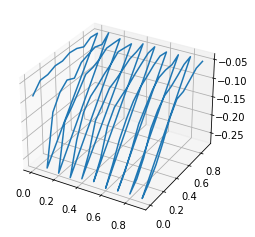

In [11]:
z = rez_ishod_2
x = rez_eps_2
y = rez_discont_2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

In [12]:
max_rez_2 = max(rez_ishod_2)
max_rez_2

-0.03981

### Часть третья, в главной роли — Дастин Хоффман

In [13]:
def schet_kart(koloda):
    sum_ostatok = 0
    for i in koloda:
        if i == 2 or i == 7:
            sum_ostatok += 0.5
        elif i == 3 or i == 4 or i == 6:
            sum_ostatok += 1
        elif i ==5 or i == 1:
            sum_ostatok += 1.5
        elif i == 9:
            sum_ostatok += -0.5
        elif i == 10:
            sum_ostatok += -1
    return sum_ostatok

In [14]:
def give_card(koloda, deck):
    if len(koloda) < 15:
        random.shuffle(deck)
        koloda = deck.copy()
    return koloda[0], koloda[1:]

In [66]:
#player
dict_rez = {}
dict_rez_seclast = {}
eps = 0.1
discont = 0.5
ostatok_koef_1 = -0.1

epoch = 100000
sum_itog = 0
random.shuffle(deck)
koloda = deck.copy()
for i in range(epoch):
#словарь в который будем записывать ключи заполняемые 5 
    new_dict = {}
    win_0 = 1
    sum_player = 0
    sum_agent = 0

    pl_card = []
    ag_card = []
    
    (take_card, koloda) = give_card(koloda, deck)
    pl_card.append(take_card)
    sum_player = usable_ace(pl_card)
    
    (take_card, koloda) = give_card(koloda, deck)
    pl_card.append(take_card)
    sum_player = usable_ace(pl_card)
    
    (take_card, koloda) = give_card(koloda, deck)
    ag_card.append(take_card)
    sum_agent = usable_ace(ag_card)

    if sum_player == 21:
        win_pl = 1.5
        a = (sum_player, sum_agent, 0)
        if a in dict_rez.keys():
            b = dict_rez[a]
            b.append(1.5)
            dict_rez[a] = b
        else:
            b = [1.5]
            dict_rez[a] = b
    elif sum_player < 12:
        while(sum_player < 12):
            a = (sum_player, sum_agent, 1)
            if a in dict_rez_seclast.keys():
                sum_2_x = 0
                for i in range(len(dict_rez_seclast[a])):
                    sum_2_x += dict_rez_seclast[a][i] * discont**(len(dict_rez_seclast[a]) - i)
                if len(dict_rez_seclast[a]) > 10 and sum_2_x/len(dict_rez_seclast[a]) > 0.6:
                    G = 0
                    win_0 = 2
                    (take_card, koloda) = give_card(koloda, deck)
                    pl_card.append(take_card)
                    sum_player = usable_ace(pl_card)
                    break
            (take_card, koloda) = give_card(koloda, deck)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
    else:
        rand = random.uniform(-1*eps, eps)
    #Проверяем, были ли раньше данные исходы и на основе их принимаем решение
        a = (sum_player, sum_agent, 1)
        b = (sum_player, sum_agent, 0)
        if a in dict_rez.keys():
            G_1 = 0
            for i in range(len(dict_rez[a])):
                G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
        else:
            G_1 = 0
        if b in dict_rez.keys():
            G_2 = 0
            for i in range(len(dict_rez[b])):
                G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
        else:
            G_2 = 0
        if (G_1 - G_2 + random.uniform(-1*eps, eps) + ostatok_koef_1 * schet_kart(koloda)) > 0:
            G = 1
        else:
            G = 0
        


    #Добавляем элемент в словарь
       
       
      
        player_key = (sum_player, sum_agent, G)
        if player_key in dict_rez.keys():
            element = dict_rez[player_key]
            element.append(5)
            dict_rez[player_key] = element
            new_dict[player_key] = 1
        else:
            element = [5]
            dict_rez[player_key] = element
            new_dict[player_key] = 1
        
        while(G != 0 and sum_player < 21):
            rand = random.uniform(-1*eps, eps)
            (take_card, koloda) = give_card(koloda, deck)
            pl_card.append(take_card)
            sum_player = usable_ace(pl_card)
            a = (sum_player, sum_agent, 1)
            b = (sum_player, sum_agent, 0)
            if a in dict_rez_seclast.keys():
                sum_2_x = 0
                for i in range(len(dict_rez_seclast[a])):
                    sum_2_x += dict_rez_seclast[a][i] * discont**(len(dict_rez_seclast[a]) - i)
                
                if len(dict_rez_seclast[a]) > 10 and sum_2_x/len(dict_rez_seclast[a]) > 0.6:
                    G = 0
                    win_0 = 2
                    (take_card, koloda) = give_card(koloda, deck)
                    pl_card.append(take_card)
                    sum_player = usable_ace(pl_card)
                    break
            
            
            if a in dict_rez.keys():
                G_1 = 0
                for i in range(len(dict_rez[a])):
                    G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
            else:
                G_1 = 0
            if b in dict_rez.keys():
                G_2 = 0
                for i in range(len(dict_rez[b])):
                    G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
            elif b in dict_rez.keys():
                G_2 = 0
            if (G_1 - G_2 + random.uniform(-1*eps, eps) + ostatok_koef_1 * schet_kart(koloda)) > 0:
                G = 1
            else:
                G = 0
            player_key = (sum_player, sum_agent, G)
            if player_key in dict_rez.keys():
                element = dict_rez[player_key]
                element.append(5)
                dict_rez[player_key] = element
                new_dict[player_key] = 1
            else:
                element = [5]
                dict_rez[player_key] = element
                new_dict[player_key] = 1
        
        
        if sum_player > 21:
            win_pl = -1 * win_0
            for i in new_dict.keys():
                dict_rez[i][-1] = win_pl
        else:
            while sum_agent < 17:
                (take_card, koloda) = give_card(koloda, deck)
                ag_card.append(take_card)
                sum_agent = usable_ace(ag_card)
            if sum_agent > 21:
                win_pl = win_0
                for i in new_dict.keys():
                    dict_rez[i][-1] = win_pl
            else:
                win_pl = win_0 * cmp(sum_player, sum_agent)
                for i in new_dict.keys():
                    dict_rez[i][-1] = win_pl
        #пополняем статистику предпоследних ходов
        a = []
        for i in new_dict.keys():
            a.append(i)
        if len(a)>2:   
            seclast_key = (a[-2][0], a[-2][1], 1)
            if seclast_key in dict_rez_seclast.keys():
                element = dict_rez_seclast[seclast_key]
                element.append(win_pl)
                dict_rez_seclast[seclast_key] = element

            else:
                element = [win_pl]
                dict_rez_seclast[seclast_key] = element
    sum_itog += win_pl
    
print(sum_itog/epoch)

-0.086435


Запустил 3 вложенных цикла, но за 12 часов он не отработал. Поэтому взял резултат лучший по двум парамметрам из 2 пункта

In [15]:
for i in range(len(rez_ishod_2)):
    if rez_ishod_2[i] == max_rez_2:
        best_number_2 = i
        break
best_rez_eps_2 = rez_eps_2[best_number_2]
best_rez_discont_2 = rez_discont_2[best_number_2]              

In [16]:
best_ostatok_koef_1 = np.arange(-1, 1, 0.1)
rez_graph_3 = []
rez_eps_3 = []
rez_discont_3 = []
rez_ishod_3 = []
rez_ostatok_koef_3 = []
eps = best_rez_eps_2
discont = best_rez_discont_2
for ostat_koef_i in best_ostatok_koef_1:
    dict_rez = {}
    dict_rez_seclast = {}
            
            
    ostatok_koef_1 = ostat_koef_i

    epoch = 100000
    sum_itog = 0
    random.shuffle(deck)
    koloda = deck.copy()
    for i in range(epoch):
#словарь в который будем записывать ключи заполняемые 5 
        new_dict = {}
        win_0 = 1
        sum_player = 0
        sum_agent = 0

        pl_card = []
        ag_card = []
    
        (take_card, koloda) = give_card(koloda, deck)
        pl_card.append(take_card)
        sum_player = usable_ace(pl_card)
    
        (take_card, koloda) = give_card(koloda, deck)
        pl_card.append(take_card)
        sum_player = usable_ace(pl_card)
    
        (take_card, koloda) = give_card(koloda, deck)
        ag_card.append(take_card)
        sum_agent = usable_ace(ag_card)

        if sum_player == 21:
            win_pl = 1.5
            a = (sum_player, sum_agent, 0)
            if a in dict_rez.keys():
                b = dict_rez[a]
                b.append(1.5)
                dict_rez[a] = b
            else:
                b = [1.5]
                dict_rez[a] = b
        elif sum_player < 12:
            while(sum_player < 12):
                a = (sum_player, sum_agent, 1)
                if a in dict_rez_seclast.keys():
                    sum_2_x = 0
                    for i in range(len(dict_rez_seclast[a])):
                        sum_2_x += dict_rez_seclast[a][i] * discont**(len(dict_rez_seclast[a]) - i)
                    if len(dict_rez_seclast[a]) > 10 and sum_2_x/len(dict_rez_seclast[a]) > 0.6:
                        G = 0
                        win_0 = 2
                        (take_card, koloda) = give_card(koloda, deck)
                        pl_card.append(take_card)
                        sum_player = usable_ace(pl_card)
                        break
                (take_card, koloda) = give_card(koloda, deck)
                pl_card.append(take_card)
                sum_player = usable_ace(pl_card)
        else:
            rand = random.uniform(-1*eps, eps)
    #Проверяем, были ли раньше данные исходы и на основе их принимаем решение
            a = (sum_player, sum_agent, 1)
            b = (sum_player, sum_agent, 0)
            if a in dict_rez.keys():
                G_1 = 0
                for i in range(len(dict_rez[a])):
                    G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
            else:
                G_1 = 0
            if b in dict_rez.keys():
                G_2 = 0
                for i in range(len(dict_rez[b])):
                    G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
            else:
                G_2 = 0
            if (G_1 - G_2 + random.uniform(-1*eps, eps) + ostatok_koef_1 * schet_kart(koloda)) > 0:
                G = 1
            else:
                G = 0
        


    #Добавляем элемент в словарь
                   
                 
      
            player_key = (sum_player, sum_agent, G)
            if player_key in dict_rez.keys():
                element = dict_rez[player_key]
                element.append(5)
                dict_rez[player_key] = element
                new_dict[player_key] = 1
            else:
                element = [5]
                dict_rez[player_key] = element
                new_dict[player_key] = 1
            while(G != 0 and sum_player < 21):
                rand = random.uniform(-1*eps, eps)
                (take_card, koloda) = give_card(koloda, deck)
                pl_card.append(take_card)
                sum_player = usable_ace(pl_card)
                a = (sum_player, sum_agent, 1)
                b = (sum_player, sum_agent, 0)
                if a in dict_rez_seclast.keys():
                    sum_2_x = 0
                    for i in range(len(dict_rez_seclast[a])):
                        sum_2_x += dict_rez_seclast[a][i] * discont**(len(dict_rez_seclast[a]) - i)
                    if len(dict_rez_seclast[a]) > 10 and sum_2_x/len(dict_rez_seclast[a]) > 0.6:
                        G = 0
                        win_pl = 2
                        (take_card, koloda) = give_card(koloda, deck)
                        pl_card.append(take_card)
                        sum_player = usable_ace(pl_card)
                        break
            
            
                if a in dict_rez.keys():
                    G_1 = 0
                    for i in range(len(dict_rez[a])):
                        G_1 += dict_rez[a][i] * discont**(len(dict_rez[a]) - i)
                else:
                    G_1 = 0
                if b in dict_rez.keys():
                    G_2 = 0
                    for i in range(len(dict_rez[b])):
                        G_2 += dict_rez[b][i] * discont**(len(dict_rez[b]) - i)
                elif b in dict_rez.keys():
                    G_2 = 0
                if (G_1 - G_2 + random.uniform(-1*eps, eps) + ostatok_koef_1 * schet_kart(koloda)) > 0:
                    G = 1
                else:
                    G = 0
                player_key = (sum_player, sum_agent, G)
                if player_key in dict_rez.keys():
                    element = dict_rez[player_key]
                    element.append(5)
                    dict_rez[player_key] = element
                    new_dict[player_key] = 1
                else:
                    element = [5]
                    dict_rez[player_key] = element
                    new_dict[player_key] = 1
        
        
            if sum_player > 21:
                win_pl = -1 * win_0
                for i in new_dict.keys():
                    dict_rez[i][-1] = win_pl
            else:
                while sum_agent < 17:
                    (take_card, koloda) = give_card(koloda, deck)
                    ag_card.append(take_card)
                    sum_agent = usable_ace(ag_card)
                if sum_agent > 21:
                    win_pl = win_0
                    for i in new_dict.keys():
                        dict_rez[i][-1] = win_pl
                else:
                    win_pl = win_0 * cmp(sum_player, sum_agent)
                    for i in new_dict.keys():
                        dict_rez[i][-1] = win_pl
        #пополняем статистику предпоследних ходов
            a = []
            for i in new_dict.keys():
                a.append(i)
            if len(a)>2:   
                seclast_key = (a[-2][0], a[-2][1], 1)
                if seclast_key in dict_rez_seclast.keys():
                    element = dict_rez_seclast[seclast_key]
                    element.append(win_pl)
                    dict_rez_seclast[seclast_key] = element

                else:
                    element = [win_pl]
                    dict_rez_seclast[seclast_key] = element
        sum_itog += win_pl
    
    rez_graph_3.append((ostat_koef_i,sum_itog/epoch))

    rez_ishod_3.append(sum_itog/epoch)
    rez_ostatok_koef_3.append(ostat_koef_i)

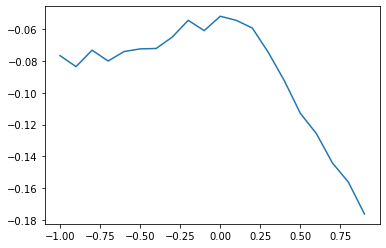

In [19]:
x = rez_ostatok_koef_3
y = rez_ishod_3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)

In [18]:
max_rez_3 = max(rez_ishod_3)
max_rez_3

-0.051895

даже немного ухудшился результат. Думаю из-за того что надо было запускать 3 цикла.
К сожалению обыграть казино не получилось 